In [12]:
#
#
#                      ,,ggddY""""Ybbgg,,
#                 ,agd""'              `""bg,
#              ,gdP"             2          "Ybg,
#            ,dP"                             "Yb,
#          ,dP"\         _,,ddP"""Ybb,,_         /"Yb,
#         ,8"    \    ,dP"'         `"Yb,     /    "8,
#        ,8'       \,d"                 "b, /       `8,
#       ,8'        d"                     "b         `8,
#       d'        d'                       `b        `b
#       8         8                         8         8
#       8         8            1            8         8
#       8         8                         8         8
#       8         Y,                       ,P         8
#       Y,         Ya                     aP         ,P
#       `8,   3     "Ya                 aP"     4   ,8'
#       `8,          "Yb,_         _,dP"          ,8'
#         `8a           `""YbbgggddP""'           a8'
#          `Yba                |                adP'
#            "Yba              |              adY"
#              `"Yba,          |          ,adP"'
#                `"Y8ba,       |     ,ad8P"'
#                      ``""YYbaaadPP""''
                      

In [13]:
%matplotlib inline
#### Simulate the sensing matrix for BPDs
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#params
lam = 1064e-9

In [15]:
# Create Gaussian beam intensity distribution with ability to offset within the array,
# only worried about the 00 mode so that's easy.
def Gauss00(x, y,x0,y0, w):
    G = (2/(np.pi*w)) * np.exp(-2*( (x-x0)**2+(y-y0)**2 )/w**2)
    #G = 2/(np.pi*w)*np.exp(-2.0/w**2* ( (x-x0)**2 + (y-y0)**2) )
    return G

In [34]:
mask_lwr_center = np.loadtxt('lowercenter.dat',delimiter=',')
mask_upr_right = np.loadtxt('upperright.dat',delimiter=',')
mask_upr_left = np.loadtxt('upperleft.dat',delimiter=',')
mask_center = np.loadtxt('center.dat',delimiter=',')


501

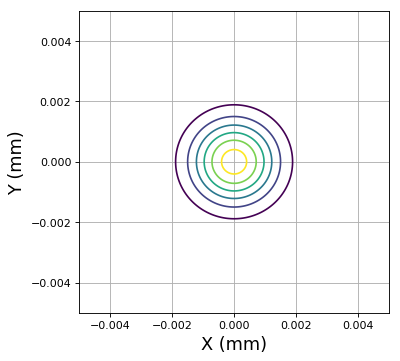

In [35]:
N = len(mask_lwr_center)
array_size=.005
x = np.linspace(-array_size, array_size, N)
y = np.linspace(-array_size, array_size, N)
X, Y = np.meshgrid(x, y)
w=1.947e-3
x0=0
y0=0
Z= Gauss00(X,Y,x0,y0,w)

plt.figure(figsize=(5, 5), dpi=80)
CS = plt.contour(X,Y,Z)
plt.xlabel("X (mm)",fontsize=16)
plt.ylabel("Y (mm)",fontsize=16)
plt.grid()
plt.show()

In [17]:
# Create array for BPD
size=(len(x),len(y))

#R = w/np.sqrt(2)
R = 1e-3

center_x_index = Z.shape[0]/2
center_y_index = Z.shape[1]/2

units = array_size/len(x)

In [18]:
#center
mask3 = np.zeros(Z.shape)
for i in range(len(X)):
    for j in range(len(Y)):
        if np.sqrt(( (center_x_index-i)**2 + (center_y_index-j)**2 ))*units>=R/2:
            mask3[i][j] = 0
        else:
            mask3[i][j] = 1

In [19]:
#full outer
mask4 = np.zeros(Z.shape)
for i in range(len(X)):
    for j in range(len(Y)):
        if np.sqrt(( (center_x_index-i)**2 + (center_y_index-j)**2 ))*units>=R/2:
            mask4[i][j] = 1
        else:
            mask4[i][j] = 0

1274539.137977283
1840659.1118462863
ratio of outter over inner is 1.4441762178974324


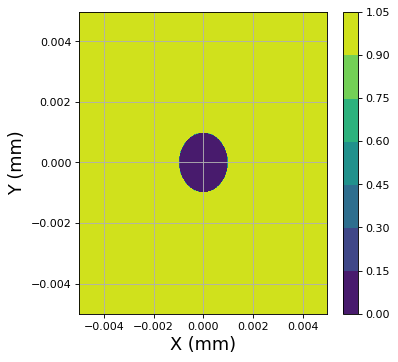

In [20]:
inner_power = np.sum(mask3*Z)
print(inner_power)

outter_power = np.sum(mask4*Z)
print(outter_power)

print("ratio of outter over inner is " + str(outter_power/inner_power))

plt.figure(figsize=(5, 5), dpi=80)
#plt.contour(X,Y,Z)
plt.contourf(X,Y,mask4)
plt.xlabel("X (mm)",fontsize=16)
plt.ylabel("Y (mm)",fontsize=16)
plt.colorbar()
plt.grid()
plt.show()

In [21]:
# Create array for Masks ()